In [2]:
import numpy as np
import matplotlib.pyplot as plt

V0, omega = 1, 0.5
nu = 0.2
N = 51
h = 0.02
I, D, A, R = 5, 25, 30, V0*h/nu
u, w = np.zeros((N+1, N+1)), np.zeros((N+1, N+1))
s = 0

In [13]:
def bordes():
    for i in range(N):
        for j in range(0,N+1):
            w[i, j] = 0
            u[i, j] = j*V0
    for i in range(0,N+1):
        u[i, N] = u[i, N-1]+ V0 * h
        w[i, N-1]=0
    for i in range(0,N+1):
        u[1, i] = u[0, j]
        w[0, i] = 0
    for i in range(0,N+1):
        if i<=I and i>=D:
            u[i, 0] = 0
            w[i, 0] = 0
    for i in range(1,N):
        u[N, i] = u[N-1, i]
        w[N, i] = w[N-1, i]

def obstaculo():
    for i in range(I, D):
        w[I, i] = -2*u[I - 1, i]/(h**2)
        w[I + D, i] = -2*u[I + D+1, i]/(h**2)
    for i in range(I, I+D+1):
        w[i, A-1] = -2*u[i, A]/(h**2)
    for j in range(0, A+1):
        u[I, j] = 0
        u[I+D, j] = 0
        u[i, A] = 0


def relajacion():
    obstaculo()
    for i in range(1, N):
        for j in range(1, N):
            r1 = omega*((u[i+1, j]+u[i-1, j]+u[i, j+1]+u[i, j-1]+ h*h*w[i, j])*0.25-u[i, j])
            u[i, j] += r1
    for i in range(1, N):
        for j in range(1, N):
            a1 = w[i+1, j] + w[i-1, j] + w[i, j+1] + w[i, j-1]
            a2 = (u[i, j+1] - u[i, j-1])*(w[i+1, j]-w[i-1, j])
            a3 = (u[i+1, j] - u[i-1, j])*(w[i, j+1]-w[i, j-1])
            r2 = omega*((a1 - (R/4)*(a2 -a3))/4 - w[i, j])
            w[i, j] += r2

10
20
30
40
50
60
70
80
90
100


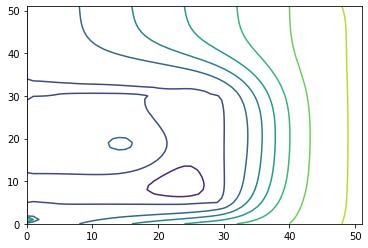

In [14]:
x = bordes()
while(s <= 100):
    s +=1
    if s%10 == 0: print(s)
    relajacion()
for i in range(0,N+1):
    for j in range(0, N+1):
        u[i,j] = u[i,j]/(V0*h)

plt.contour(u)
plt.show()